11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 35s 20ms/step - accuracy: 0.9011 - loss: 0.3247 - val_accuracy: 0.9780 - val_loss: 0.0781
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 33s 20ms/step - accuracy: 0.9827 - loss: 0.0586 - val_accuracy: 0.9855 - val_loss: 0.0552
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 32s 19ms/step - accuracy: 0.9891 - loss: 0.0358 - val_accuracy: 0.9870 - val_loss: 0.0476
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 37s 22ms/step - accuracy: 0.9928 - loss: 0.0226 - val_accuracy: 0.9847 - val_loss: 0.0528
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 34s 20ms/step - accuracy: 0.9953 - loss: 0.0141 - val_accuracy: 0.9882 - val_loss: 0.0493
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9809 - loss: 0.0619
Test Accuracy: 0.9850000143051147


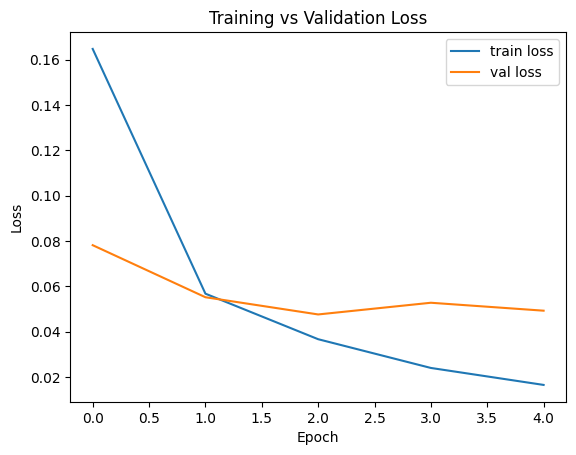

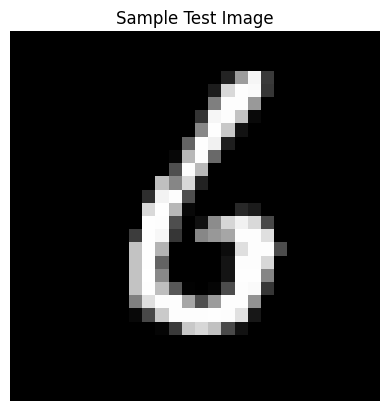

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
Predicted digit: 6


In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

# 1. Load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 2. Reshape & Normalize
x_train = x_train.reshape((60000, 28, 28, 1)) / 255.0
x_test = x_test.reshape((10000, 28, 28, 1)) / 255.0

# 3. One-hot encode labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# 4. Build CNN Model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(100, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 5. Train
history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)

# 6. Evaluate
loss, accuracy = model.evaluate(x_test, y_test)
print("Test Accuracy:", accuracy)

# 7. Plot loss
plt.plot(history.history['loss'], label="train loss")
plt.plot(history.history['val_loss'], label="val loss")
plt.legend()
plt.title("Training vs Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

# 8. Testing on a sample image
index = 50
plt.imshow(x_test[index].reshape(28,28), cmap='gray')
plt.title("Sample Test Image")
plt.axis('off')
plt.show()

prediction = model.predict(np.array([x_test[index]]))
print("Predicted digit:", prediction.argmax())